In [1]:
import pandas as pd
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import numpy as np
from plotly.graph_objs import Scatter, Figure, Layout, Histogram, Box
init_notebook_mode(connected=True)

In [2]:
df = pd.read_csv("pali_vs_susie.csv", header=None, names=["pali", "susie", "t_pali", "t_susie",
                                                          "n_relations", "size_max_function", "n_functions"])

In [3]:
df["pali"] = ~df["pali"]
df["susie"] = ~df["susie"]

In [4]:
df.head()

,pali,susie,t_pali,t_susie,n_relations,size_max_function,n_functions
0,False,False,0.049613,0.004216,10,3,30
1,False,False,0.033637,0.003272,10,3,30
2,False,False,0.041984,0.004240,10,3,30
3,True,False,0.042741,0.009742,10,3,30
4,False,False,0.046592,0.003973,10,3,30


In [5]:
df[["pali", "susie"]].describe()

,pali,susie
count,10706,10706
unique,2,2
top,False,False
freq,7426,9781


In [6]:
df_n_functions = df[df["n_relations"] == 10]

In [7]:
df_grouped = df_n_functions[["pali", "susie", "n_functions"]].groupby(by="n_functions")

In [8]:
means = df_grouped.agg("mean")

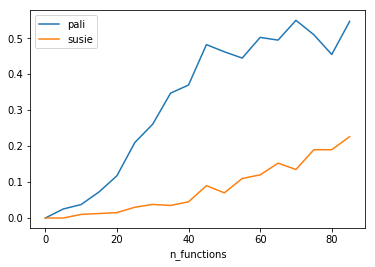

In [9]:
means.plot(kind="line")

In [16]:
means.index

Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,
            85],
           dtype='int64', name='n_functions')

In [26]:
data = []
data.append(Scatter(x=means.index, y=100*np.array(means["pali"]), name="Pali",
                   line = dict(
        color = ('rgb(0, 0, 0)'),
        width = 4))) # dash options include 'dash', 'dot', and 'dashdot'))
data.append(Scatter(x=means.index, y=100*np.array(means["susie"]), name="Susie",
                   line = dict(
        color = ('rgb(0, 0, 0)'),
        width = 4,
        dash = 'dot')))

In [27]:
layout = Layout(
  #  title='Comparisation Performance With Rule Order Optimization',
    font=dict(family='Latin Modern Math', size=6*3),
    xaxis=dict(
        title='Number of Functions',
        autorange=True,
        showgrid=False,
        zeroline=False,
        showline=False,
        autotick=True,
        ticks='',
        showticklabels=True
    ),
    yaxis=dict(
        title='Percentage of Answered Queries',
        autorange=True,
        showgrid=False,
        zeroline=True,
        showline=True,
        autotick=True,
        ticks='',
        showticklabels=True
    ),
    legend=dict(x=0, y=1)
)
fig = Figure(data=data, layout=layout)
iplot(fig)

In [28]:
df_n_relations = df[df["n_functions"] == 30]

In [29]:
df_grouped = df_n_relations[["pali", "susie", "n_relations"]].groupby(by="n_relations")

In [30]:
means = df_grouped.agg("mean")

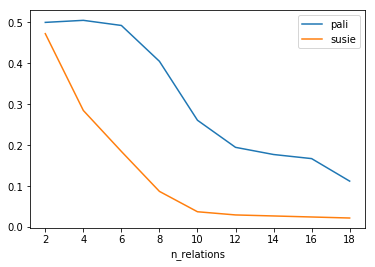

In [31]:
means.plot(kind="line")

In [32]:
data = []
data.append(Scatter(x=means.index, y=100*np.array(means["pali"]), name="Pali",
                   line = dict(
        color = ('rgb(0, 0, 0)'),
        width = 4))) # dash options include 'dash', 'dot', and 'dashdot'))
data.append(Scatter(x=means.index, y=100*np.array(means["susie"]), name="Susie",
                   line = dict(
        color = ('rgb(0, 0, 0)'),
        width = 4,
        dash = 'dot')))

In [34]:
layout = Layout(
  #  title='Comparisation Performance With Rule Order Optimization',
    font=dict(family='Latin Modern Math', size=6*3),
    xaxis=dict(
        title='Number of Relations',
        autorange=True,
        showgrid=False,
        zeroline=False,
        showline=False,
        autotick=True,
        ticks='',
        showticklabels=True
    ),
    yaxis=dict(
        title='Percentage of Answered Queries',
        autorange=True,
        showgrid=False,
        zeroline=True,
        showline=True,
        autotick=True,
        ticks='',
        showticklabels=True
    ),
    legend=dict(x=1, y=1)
)
fig = Figure(data=data, layout=layout)
iplot(fig)